# Dataset: Aprendizado do Classificador
- Autor: Enzo Takeshi Ikeda (9784377)

In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [68]:
img_height, img_width = 150, 150
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 300 files belonging to 5 classes.
Found 50 files belonging to 5 classes.
Found 100 files belonging to 5 classes.


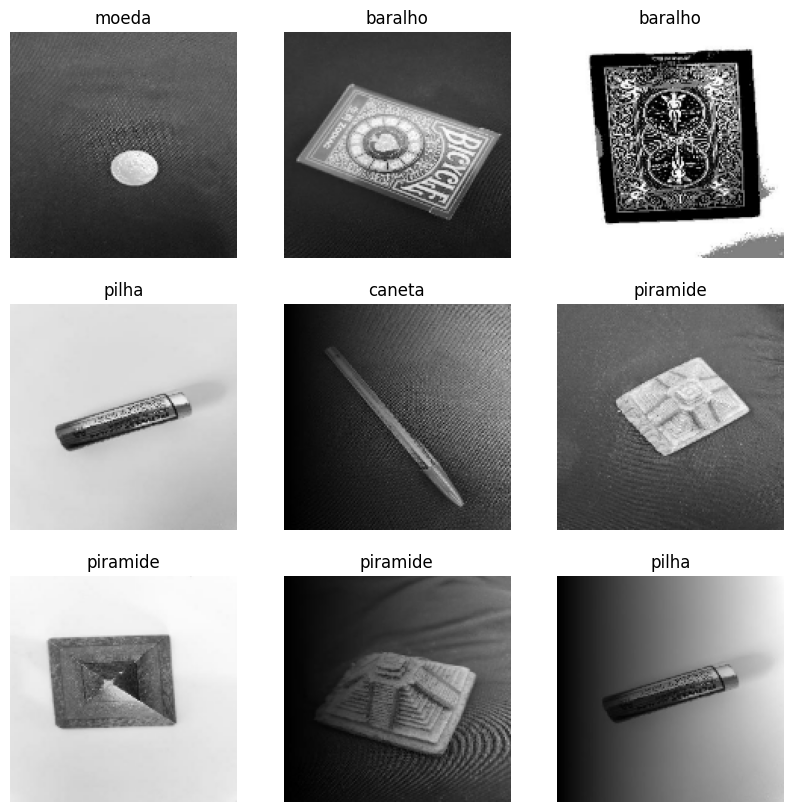

In [69]:
class_names = ["baralho", "caneta", "moeda", "pilha", "piramide"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [70]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(5)
    ]
)


In [71]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [72]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
15/15 [==============================] - 4s 208ms/step - loss: 1.5644 - accuracy: 0.2433 - val_loss: 1.5161 - val_accuracy: 0.5200
Epoch 2/10
15/15 [==============================] - 3s 196ms/step - loss: 1.2221 - accuracy: 0.5900 - val_loss: 1.3928 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - 3s 192ms/step - loss: 0.7595 - accuracy: 0.7533 - val_loss: 1.0806 - val_accuracy: 0.6200
Epoch 4/10
15/15 [==============================] - 3s 204ms/step - loss: 0.5962 - accuracy: 0.7833 - val_loss: 0.4980 - val_accuracy: 0.7800
Epoch 5/10
15/15 [==============================] - 3s 199ms/step - loss: 0.3963 - accuracy: 0.8900 - val_loss: 0.4749 - val_accuracy: 0.8800
Epoch 6/10
15/15 [==============================] - 3s 193ms/step - loss: 0.2040 - accuracy: 0.9333 - val_loss: 0.5554 - val_accuracy: 0.7800
Epoch 7/10
15/15 [==============================] - 3s 202ms/step - loss: 0.0798 - accuracy: 0.9800 - val_loss: 0.3094 - val_accuracy: 0.8800
Epoch 

In [73]:
model.evaluate(test_ds)

5/5 [==============================] - 0s 45ms/step - loss: 0.3069 - accuracy: 0.9100


[0.3068791627883911, 0.9100000262260437]

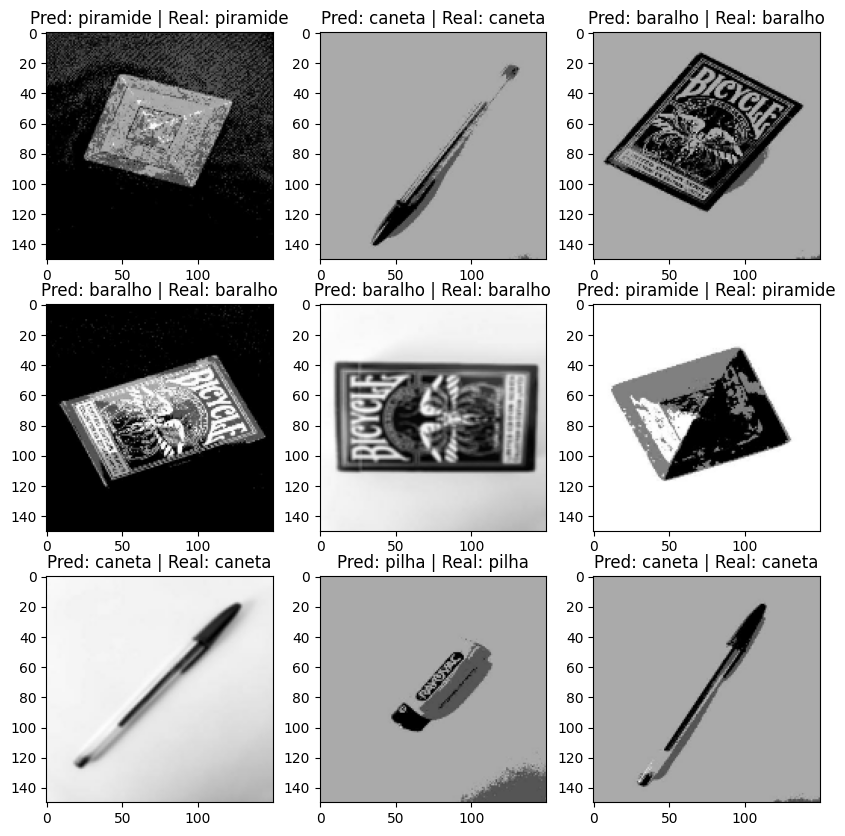

In [76]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [75]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp0oy54hqt/assets


INFO:tensorflow:Assets written to: /tmp/tmp0oy54hqt/assets
2023-12-18 14:00:30.651120: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-12-18 14:00:30.651147: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-12-18 14:00:30.651435: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp0oy54hqt
2023-12-18 14:00:30.652628: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-12-18 14:00:30.652638: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp0oy54hqt
2023-12-18 14:00:30.655321: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2023-12-18 14:00:30.656580: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-12-18 14:00:30.703376: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio